<a href="https://colab.research.google.com/github/tortonef/ML-Projects/blob/main/Brain_Tumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Brain Tumor CNN Study**

**Non-Quantized Model**

In [1]:
from imutils import paths
import matplotlib.pyplot as plt
import argparse
import os
import cv2

# Load the images directories
path = "/content/drive/MyDrive/archive"
image_paths = list(paths.list_images(path))

In [2]:
images = []
labels = []

for image_path in image_paths:
    label = image_path.split(os.path.sep)[-2]
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224, 224))

    images.append(image)
    labels.append(label)

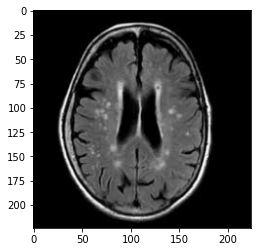

In [3]:
def plot_image(image):
    plt.imshow(image)
plot_image(images[0])

In [4]:
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical
import numpy as np

images = np.array(images) / 255.0
labels = np.array(labels)

label_binarizer = LabelBinarizer()
labels = label_binarizer.fit_transform(labels)
labels = to_categorical(labels)

In [5]:
from sklearn.model_selection import train_test_split

(train_X, test_X, train_Y, test_Y) = train_test_split(images, labels, test_size= 0.10, random_state= 42, stratify= labels)

In [6]:
print(train_X.shape)

(455, 224, 224, 3)


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(fill_mode= 'nearest', rotation_range= 15)

Create CNN

In [44]:
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.applications import VGG16

model = models.Sequential()
model.add(Conv2D(128, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(96, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation="softmax"))

In [45]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 222, 222, 128)     3584      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 111, 111, 128)    0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 109, 109, 96)      110688    
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 54, 54, 96)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 52, 52, 64)        55360     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 26, 26, 64)      

In [46]:
import tensorflow as tf
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_X, train_Y, epochs=10, 
                    validation_data=(test_X, test_Y))

Epoch 1/10
15/15 [==============================] - 5s 218ms/step - loss: 0.6284 - accuracy: 0.6703 - val_loss: 0.5120 - val_accuracy: 0.7647
Epoch 2/10
15/15 [==============================] - 2s 133ms/step - loss: 0.5104 - accuracy: 0.7890 - val_loss: 0.4831 - val_accuracy: 0.8039
Epoch 3/10
15/15 [==============================] - 2s 134ms/step - loss: 0.4481 - accuracy: 0.7978 - val_loss: 0.4806 - val_accuracy: 0.8431
Epoch 4/10
15/15 [==============================] - 2s 137ms/step - loss: 0.3815 - accuracy: 0.8527 - val_loss: 0.4466 - val_accuracy: 0.7647
Epoch 5/10
15/15 [==============================] - 2s 135ms/step - loss: 0.2419 - accuracy: 0.9055 - val_loss: 0.2970 - val_accuracy: 0.8824
Epoch 6/10
15/15 [==============================] - 2s 135ms/step - loss: 0.1229 - accuracy: 0.9648 - val_loss: 0.1819 - val_accuracy: 0.9216
Epoch 7/10
15/15 [==============================] - 2s 135ms/step - loss: 0.0907 - accuracy: 0.9736 - val_loss: 0.1847 - val_accuracy: 0.9412
Epoch 

Results Analysis

In [47]:
from sklearn.metrics import classification_report, confusion_matrix

predictions = model.predict(test_X, batch_size= batch_size)
predictions = np.argmax(predictions, axis= 1)
actuals = np.argmax(test_Y, axis= 1)

print(classification_report(actuals, predictions, target_names= label_binarizer.classes_))

cm = confusion_matrix(actuals, predictions)
print(cm)

7/7 [==============================] - 1s 40ms/step
              precision    recall  f1-score   support

          no       1.00      1.00      1.00        20
         yes       1.00      1.00      1.00        31

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51

[[20  0]
 [ 0 31]]


In [48]:
total = sum(sum(cm))
accuracy = (cm[0, 0] + cm[1, 1]) / total
print("Accuracy: {:.4f}".format(accuracy))

Accuracy: 1.0000


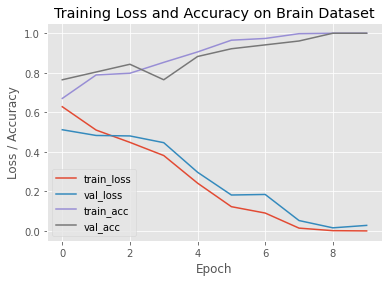

In [49]:
N = 10
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label= "train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label= "val_loss")

plt.plot(np.arange(0, N), history.history["accuracy"], label= "train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label= "val_acc")

plt.title("Training Loss and Accuracy on Brain Dataset")
plt.xlabel("Epoch")
plt.ylabel("Loss / Accuracy")
plt.legend(loc= "lower left")
plt.savefig("plot.jpg")

In [51]:
model.save('/content/drive/MyDrive/Brain_Tumor_Teacher')

# **Quantized Model**

Load QKeras

In [54]:
pip install tensorflow-model-optimization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 238 kB 31.4 MB/s 


In [55]:
import sys
sys.path.insert(1, '/content/drive/My Drive/qkeras/')
from qkeras import *
from tensorflow.keras.layers import * 
from tensorflow.keras.layers import Input

Build Quantized Model

In [132]:
n = 4
qmodel = models.Sequential()
qmodel.add(Conv2D(2, (3, 3), activation='relu', input_shape=(224, 224, 3)))
qmodel.add(Flatten())
qmodel.add(QDense(1,kernel_quantizer=quantized_bits((n)),bias_quantizer=quantized_bits((n)),name='QDense_1'))
qmodel.add(QDense(2,kernel_quantizer=quantized_bits((n)),bias_quantizer=quantized_bits((n)),name='QDense_2'))
qmodel.add(Activation("softmax",name='Act_output'))

In [133]:
qmodel.summary()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_77 (Conv2D)          (None, 222, 222, 2)       56        
                                                                 
 flatten_30 (Flatten)        (None, 98568)             0         
                                                                 
 QDense_1 (QDense)           (None, 1)                 98569     
                                                                 
 QDense_2 (QDense)           (None, 2)                 4         
                                                                 
 Act_output (Activation)     (None, 2)                 0         
                                                                 
Total params: 98,629
Trainable params: 98,629
Non-trainable params: 0
_________________________________________________________________


In [134]:
import tensorflow as tf
qmodel.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = qmodel.fit(train_X, train_Y, epochs=10, 
                    validation_data=(test_X, test_Y))

Epoch 1/10
15/15 [==============================] - 2s 67ms/step - loss: 3.6467 - accuracy: 0.5429 - val_loss: 2.7374 - val_accuracy: 0.6275
Epoch 2/10
15/15 [==============================] - 0s 21ms/step - loss: 1.4633 - accuracy: 0.6110 - val_loss: 1.1461 - val_accuracy: 0.8039
Epoch 3/10
15/15 [==============================] - 0s 21ms/step - loss: 0.9385 - accuracy: 0.7385 - val_loss: 0.8443 - val_accuracy: 0.8039
Epoch 4/10
15/15 [==============================] - 0s 22ms/step - loss: 0.7114 - accuracy: 0.7890 - val_loss: 0.7020 - val_accuracy: 0.8235
Epoch 5/10
15/15 [==============================] - 0s 21ms/step - loss: 0.6292 - accuracy: 0.8440 - val_loss: 0.6290 - val_accuracy: 0.7647
Epoch 6/10
15/15 [==============================] - 0s 21ms/step - loss: 0.5924 - accuracy: 0.9231 - val_loss: 0.6147 - val_accuracy: 0.8431
Epoch 7/10
15/15 [==============================] - 0s 20ms/step - loss: 0.5711 - accuracy: 0.9648 - val_loss: 0.5887 - val_accuracy: 0.8824
Epoch 8/10
15

Results Analysis

In [136]:
from sklearn.metrics import classification_report, confusion_matrix

predictions = qmodel.predict(test_X, batch_size= batch_size)
predictions = np.argmax(predictions, axis= 1)
actuals = np.argmax(test_Y, axis= 1)

print(classification_report(actuals, predictions, target_names= label_binarizer.classes_))

cm = confusion_matrix(actuals, predictions)
print(cm)

7/7 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

          no       1.00      0.90      0.95        20
         yes       0.94      1.00      0.97        31

    accuracy                           0.96        51
   macro avg       0.97      0.95      0.96        51
weighted avg       0.96      0.96      0.96        51

[[18  2]
 [ 0 31]]


In [137]:
total = sum(sum(cm))
accuracy = (cm[0, 0] + cm[1, 1]) / total
print("Accuracy: {:.4f}".format(accuracy))

Accuracy: 0.9608


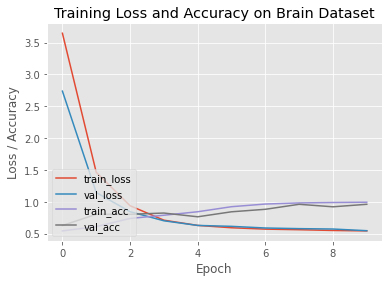

In [138]:
N = 10
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label= "train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label= "val_loss")

plt.plot(np.arange(0, N), history.history["accuracy"], label= "train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label= "val_acc")

plt.title("Training Loss and Accuracy on Brain Dataset")
plt.xlabel("Epoch")
plt.ylabel("Loss / Accuracy")
plt.legend(loc= "lower left")
plt.savefig("plot.jpg")

Same Accuracy of CNN non-quantized model with less than 100k parameters and 4 bits